# import important library to use

In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import statsmodels.api as sm# import important library to use

# Read Data

In [2]:
df = pd.read_csv(r'F:\CodSoft\advertising\advertising.csv')
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [3]:
df.shape

(200, 4)

# Data Cleaning

In [4]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [5]:
df.duplicated().sum()

0

# Exploratory Data Analysis (EDA) 

### Return some information about our column

In [6]:
columns = df.columns
columns### Return some information about our column

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


### Return some statistic information about our column

In [8]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


### the correlation between different features in the dataset

In [9]:
df.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


### Visual representation of the correlation between different features in the dataset

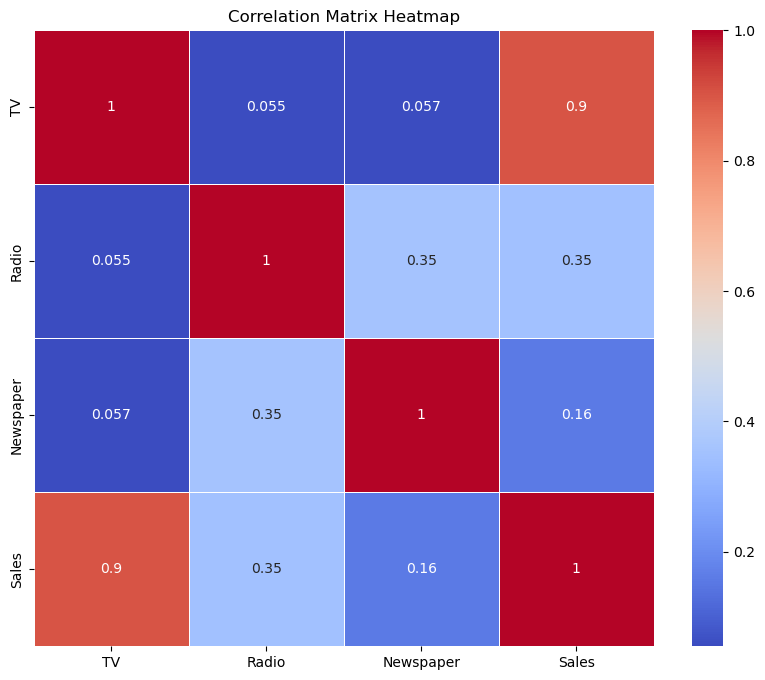

In [10]:
corr_matrix = df.corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()### Visual representation of the correlation between different features in the dataset

### Show distribution of values in each column of the dataset

<Figure size 1200x1200 with 0 Axes>

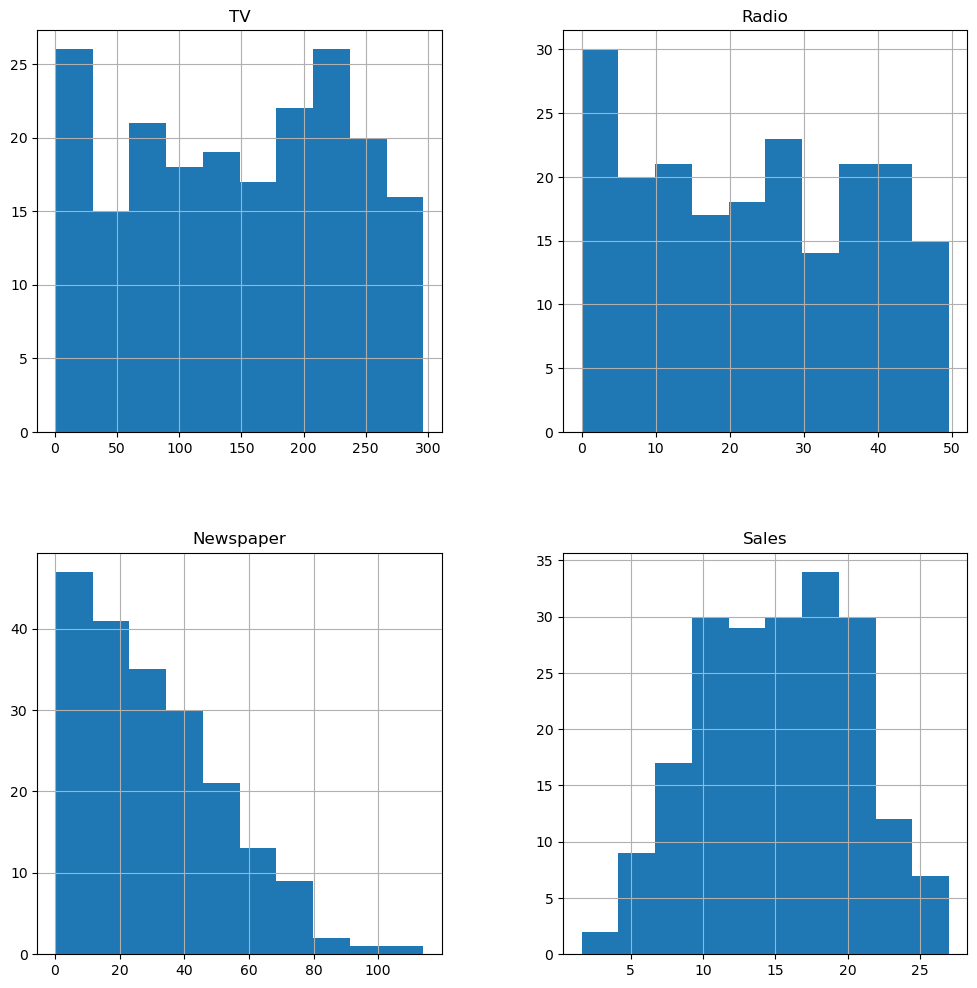

In [11]:
plt.figure(figsize=(12, 12))
df.hist(figsize=(12, 12))
plt.show()

### fix right skewed in Newspaper column

In [12]:
df['Newspaper'] = np.log(df['Newspaper'])

In [13]:
df['Newspaper'] = df['Newspaper'] ** 2

### Show distribution of values in each column of the dataset after fixing skewed

<Figure size 1200x1200 with 0 Axes>

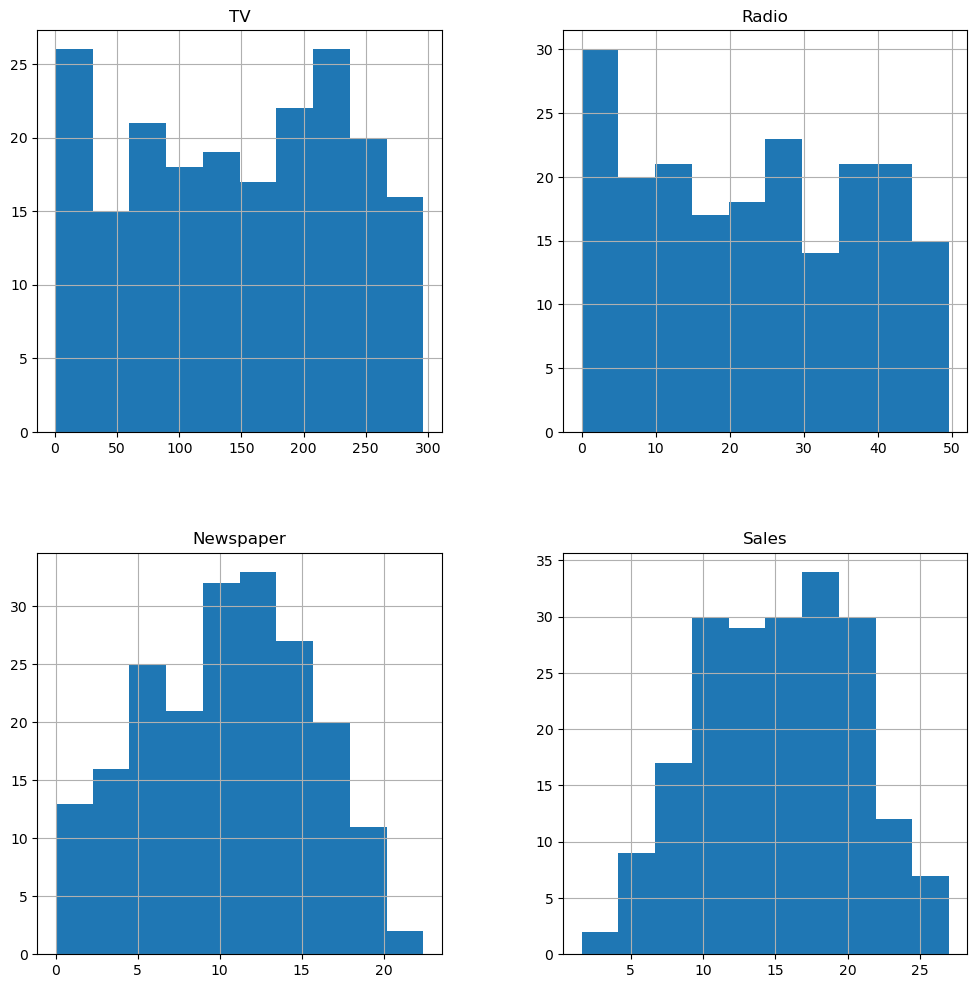

In [14]:
plt.figure(figsize=(12, 12))
df.hist(figsize=(12, 12))
plt.show()

### Scatter plot for each column vs sales column

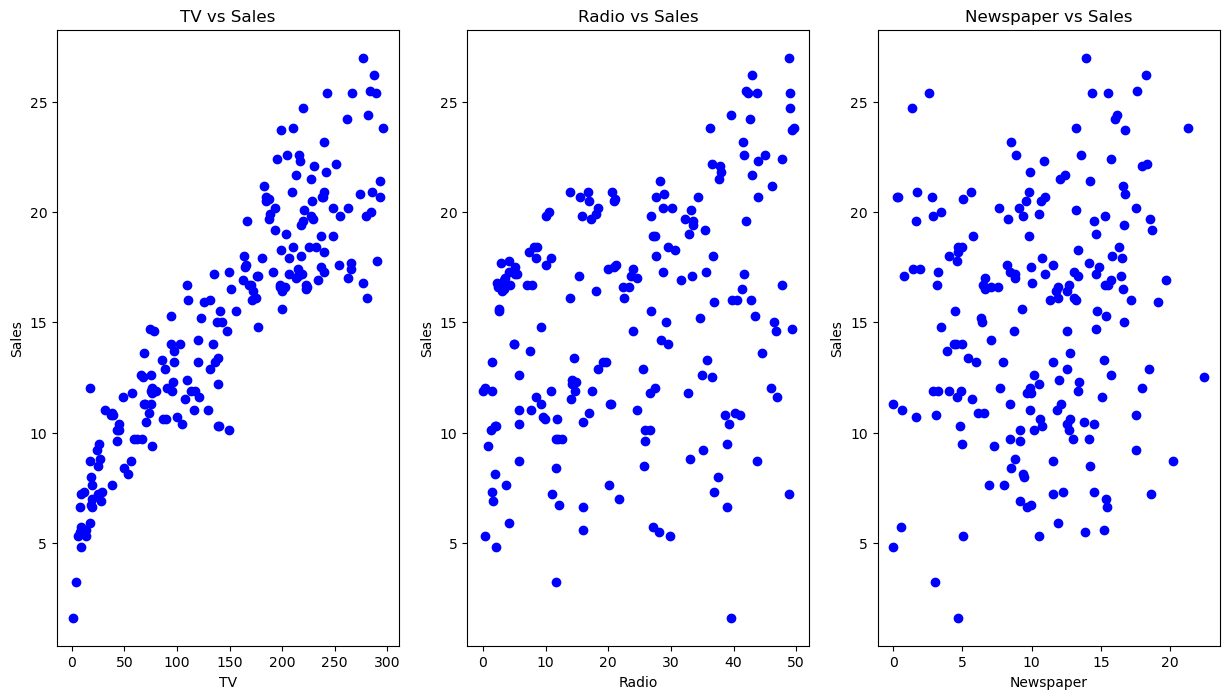

In [15]:
plt.figure(figsize=(15,8))

plt.subplot(1,3,1)
plt.scatter(df['TV'],df['Sales'],color='blue')
plt.title('TV vs Sales')
plt.xlabel('TV')
plt.ylabel('Sales')

plt.subplot(1,3,2)
plt.scatter(df['Radio'],df['Sales'],color='blue')
plt.title('Radio vs Sales')
plt.xlabel('Radio')
plt.ylabel('Sales')

plt.subplot(1,3,3)
plt.scatter(df['Newspaper'],df['Sales'],color='blue')
plt.title('Newspaper vs Sales')
plt.xlabel('Newspaper')
plt.ylabel('Sales')

plt.show()

<Axes: >

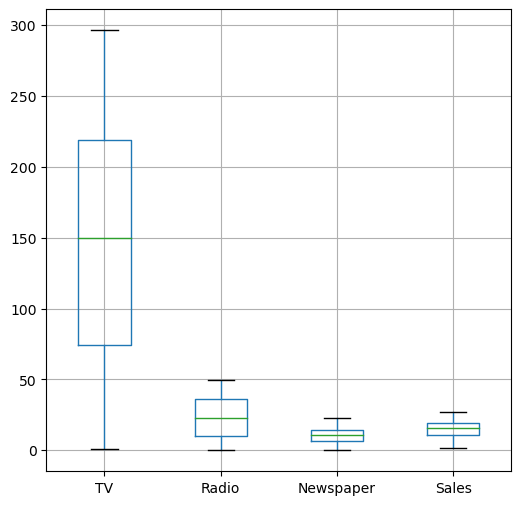

In [16]:
plt.figure(figsize=(6,6))
df.boxplot()

# Data Preprocessing

### Separate our data to depended and independed features

In [17]:
x = df.drop(columns=['Sales'],axis = 1)
y = df['Sales']### Separate our data to depended and independed features

### Scale our Data

In [18]:
x =pd.DataFrame( preprocessing.StandardScaler().fit(x).transform(x.astype(float)), columns=['TV', 'Radio', 'Newspaper'])
x


,TV,Radio,Newspaper
0,0.969852,0.981522,1.483963
1,-1.197376,1.082808,0.806888
2,-1.516155,1.528463,1.486369
3,0.052050,1.217855,1.209720
4,0.394182,-0.841614,1.206984
...,...,...,...
195,-1.270941,-1.321031,-0.690658
196,-0.617035,-1.240003,-1.184616
197,0.349810,-0.942899,-1.367429
198,1.594565,1.265121,1.410526


### Split our data to training and test sets

In [19]:
x_train , x_test , y_train , y_test = train_test_split (x,y,test_size=0.2,random_state=10)
print('trainig size',x_train.shape,y_train.shape)
print('test size',x_test.shape,y_test.shape)

trainig size (160, 3) (160,)
test size (40, 3) (40,)


# Lets Build Simple linear regression model and multible linear regression model and compare between them

# Simple linear regression model

### Build model 

### Independent variable >> TV
### Dependent variable >>> Sales

In [20]:
x_train_TV = x_train[['TV']]
x_test_TV = x_test[['TV']]

In [21]:
reg = linear_model.LinearRegression()
reg

LinearRegression()

In [22]:
reg.fit(x_train_TV , y_train)

LinearRegression()

In [23]:
print('Coefficients : ',reg.coef_)
print('Intercept : ',reg.intercept_)

Coefficients :  [4.68626673]
Intercept :  15.041074845250249


### Plot our simple linear model

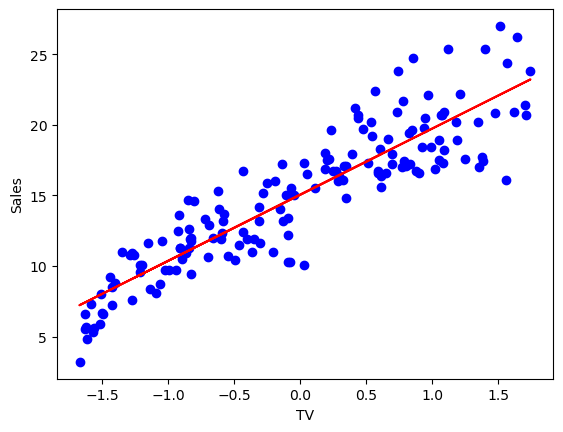

In [24]:
plt.scatter(x_train_TV , y_train , color = 'blue')
plt.plot(x_train_TV, reg.coef_*x_train_TV + reg.intercept_ , 'red')
plt.xlabel('TV')
plt.ylabel('Sales')
plt.show()

# Evaluation

In [25]:
y_hat = reg.predict(x_test_TV)

In [26]:
MAE_simple = np.mean(np.absolute(y_hat - y_test))
MSE_simple = mean_squared_error(y_hat , y_test)
r2_score_simple = r2_score(y_test , y_hat)

print("Mean absolute error: %.2f"% MAE_simple)
print("Mean square error: %.2f"% MSE_simple)
print("r2_Score: %.2f"% r2_score_simple)
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % reg.score(x_test_TV , y_test))

Mean absolute error: 2.22
Mean square error: 7.29
r2_Score: 0.82
Variance score: 0.82


# Checking residuals

In [27]:
residual = y_test - y_hat

## Normal Q-Q Plot

This plot helps assess whether residuals are normally distributed.
A straight line indicates that residuals are normally distributed, which is an assumption of linear regression.

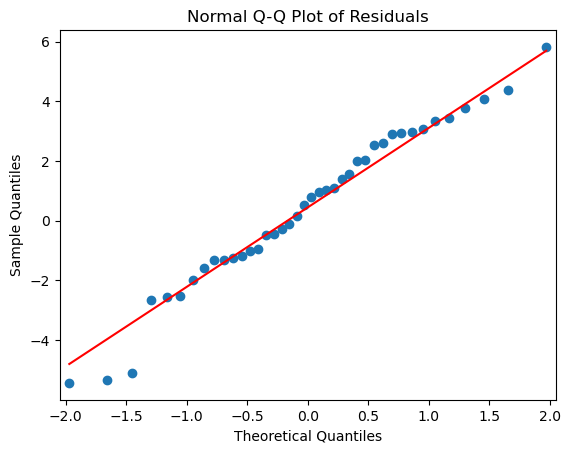

In [28]:
# Create a QQ plot of residuals
sm.qqplot(residual, line='s')
plt.title('Normal Q-Q Plot of Residuals')
plt.show()


## scatter plot of predicted values (y_hat) against residuals

This plot helps you visually inspect whether there's any pattern or structure in the residuals as the predicted values change.
Ideally, residuals should be randomly scattered around zero, indicating that the model is capturing the data's variance effectively.


### residuals are randomly scattered around zero betwwen [-5 , 5]

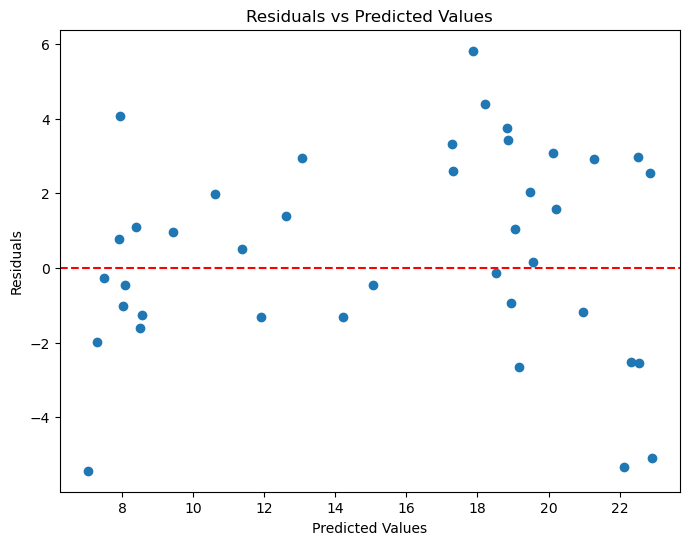

In [29]:
# Plot predicted values vs residuals
plt.figure(figsize=(8, 6))
plt.scatter(y_hat, residual)
plt.axhline(0, color='r', linestyle='--')
plt.title('Residuals vs Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

# Multiple linear regression model

### Build model 

In [30]:
reg_multi = linear_model.LinearRegression()
reg_multi

LinearRegression()

In [31]:
reg_multi.fit(x_train , y_train)

LinearRegression()

In [32]:
print('Coefficients : ',reg_multi.coef_)
print('Intercept : ',reg_multi.intercept_)

Coefficients :  [ 4.5847098   1.61793634 -0.05496238]
Intercept :  15.155184623971568


# Evaluation

In [33]:
y_hat_multi = reg_multi.predict(x_test)

In [34]:
MAE_mutiple = np.mean(np.absolute(y_hat_multi - y_test))
MSE_mutiple = mean_squared_error(y_hat_multi , y_test)
r2_score_mutiple = r2_score(y_test , y_hat_multi)

print("Mean absolute error: %.2f"% MAE_mutiple)
print("Mean square error: %.2f"% MSE_mutiple)
print("r2_Score: %.2f"% r2_score_mutiple)
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % reg_multi.score(x_test , y_test))

Mean absolute error: 1.58
Mean square error: 4.47
r2_Score: 0.89
Variance score: 0.89


# Checking residuals

In [35]:
mult_residual = y_test - y_hat_multi

## Normal Q-Q Plot

This plot helps assess whether residuals are normally distributed.
A straight line indicates that residuals are normally distributed, which is an assumption of linear regression.

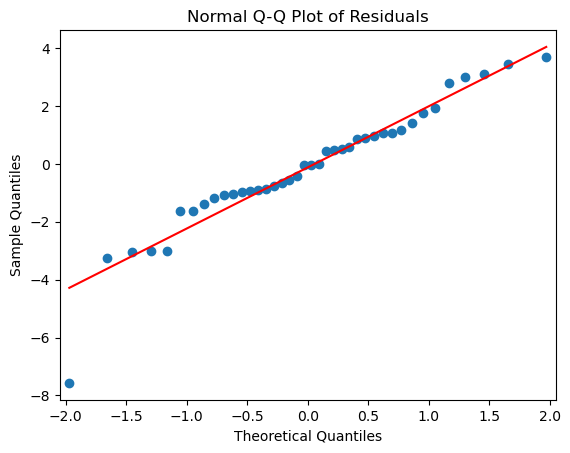

In [36]:
# Create a QQ plot of residuals
sm.qqplot(mult_residual, line='s')
plt.title('Normal Q-Q Plot of Residuals')
plt.show()


## scatter plot of predicted values (y_hat) against residuals

This plot helps you visually inspect whether there's any pattern or structure in the residuals as the predicted values change.
Ideally, residuals should be randomly scattered around zero, indicating that the model is capturing the data's variance effectively.


### residuals are randomly scattered around zero betwwen [-4 , 4]

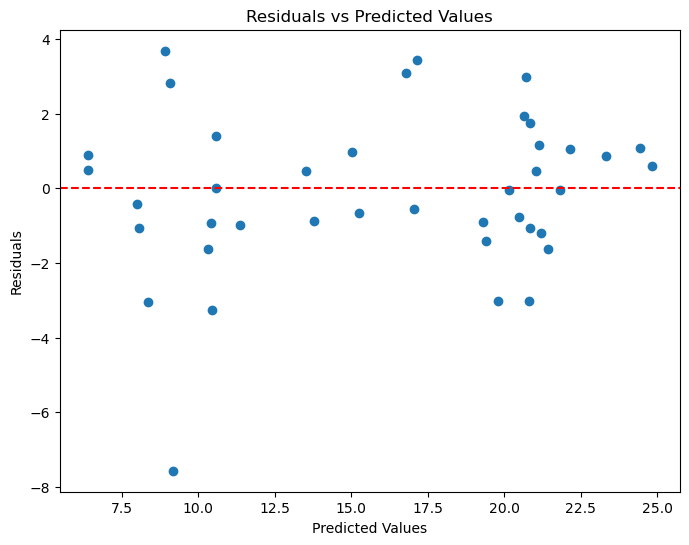

In [37]:
# Plot predicted values vs residuals
plt.figure(figsize=(8, 6))
plt.scatter(y_hat_multi, mult_residual)
plt.axhline(0, color='r', linestyle='--')
plt.title('Residuals vs Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

# compare between two models 

In [38]:
models = pd.DataFrame([
    {'Mean Absloute error' : MAE_simple,'Mean Square error':MSE_simple , 'R2-score':r2_score_simple },
    { 'Mean Absloute error' : MAE_mutiple,'Mean Square error':MSE_mutiple , 'R2-score':r2_score_mutiple }
], index=['Simple Linear Regression', 'Multiple Linear Regression'])

models.index.name = 'Model Name'

models

,Mean Absloute error,Mean Square error,R2-score
Model Name,,,
Simple Linear Regression,2.223503,7.287404,0.817624
Multiple Linear Regression,1.578696,4.471665,0.888091


### multiple linear regression model is showing better results